In [31]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["font.size"] = 16

In [8]:
routes  = pd.read_csv("../../../../data/mmt_gtfs/routes/all_routes.csv")
trips   = pd.read_csv("../../../../data/mmt_gtfs/trips.csv")  # 11,640 different trips
colored = gpd.read_file("../../../../data/bus_route_stop_info/routes_colored-shp")

In [11]:
set(colored["route_shor"]).difference(set(trips["route_short_name"]))

set(colored["route_shor"])

headsigns = set(routes["stop_headsign"])

In [336]:
set(colored["route_shor"]).difference(set(trips["route_short_name"]))

{1, 3, 14, 19, 25, 28, 29, 34, 35, 37, 38, 47, 56, 57, 58, 71}

In [ ]:
data = pd.read_csv("../../../../data/FTA/madison_data.csv").set_index("date").loc["JAN16":, :]
data.round(2).head()

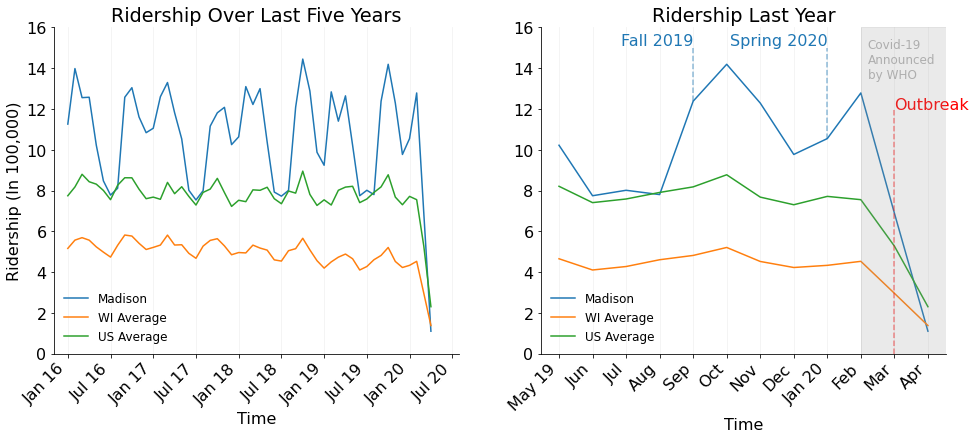

In [330]:
# xticks = np.arange(0, 550, 100)

fig, axes = plt.subplots(ncols=2, figsize=(16, 6))
a1, a2 = (axes[0], axes[1])

# -------------------------------- a1 --------------------------------
a1.plot(data.index, data["upt_madison"], label="Madison")
a1.plot(data.loc[:"APR20", :].index, data.loc[:"APR20", :]["upt_wisc_state"], label="WI Average")
a1.plot(data.loc[:"APR20", :].index, data.loc[:"APR20", :]["upt_us"], label="US Average")

a1.set_xlim((-2, 55))
a1.set_xticks(np.arange(0, 55, 6))
a1.set_xticklabels(["Jan 16", "Jul 16", "Jan 17", "Jul 17",
                    "Jan 18", "Jul 18", "Jan 19", "Jul 19",
                    "Jan 20", "Jul 20"], rotation=45, ha="right")

a1.set_yticks(np.arange(0, 18, 2) * 100000)
a1.set_yticklabels(list(map(str, np.arange(0, 18, 2))))

a1.set_title("Ridership Over Last Five Years")
a1.set_ylabel("Ridership (In 100,000)")
a1.set_xlabel("Time")
a1.legend(frameon=False, fontsize=12)
a1.grid(axis='x', color='0.95')
a1.spines['right'].set_visible(False)
a1.spines['top'].set_visible(False)

# -------------------------------- a2 --------------------------------
a2.plot(data.loc["MAY19":, :].index, data.loc["MAY19":, :]["upt_madison"], label="Madison")
a2.plot(data.loc["MAY19":"APR20", :].index, data.loc["MAY19":"APR20", :]["upt_wisc_state"], label="WI Average")
a2.plot(data.loc["MAY19":"APR20", :].index, data.loc["MAY19":"APR20", :]["upt_us"], label="US Average")

# a2.set_xlim((-1, 13))
a2.set_xticks(np.arange(0, 12, 1))
a2.set_xticklabels(["May 19", "Jun", "Jul", "Aug", "Sep",
                    "Oct", "Nov", "Dec", "Jan 20", "Feb",
                    "Mar", "Apr"], rotation=45, ha="right")
a2.set_yticks(np.arange(0, 18, 2) * 100000)
a2.set_yticklabels(list(map(str, np.arange(0, 18, 2))))

f19 = plt.Line2D((4, 4), (data.loc["SEP19", "upt_madison"], a2.get_ylim()[1] - 100000), color="#1f77b4", linestyle="--", alpha=0.5)
a2.text(4, a2.get_ylim()[1] - 100000, "Fall 2019", va="bottom", ha="right", color="#1f77b4")
a2.add_artist(f19)

s20 = plt.Line2D((8, 8), (data.loc["JAN20", "upt_madison"], a2.get_ylim()[1] - 100000), color="#1f77b4", linestyle="--", alpha=0.5)
a2.text(8, a2.get_ylim()[1] - 100000, "Spring 2020", va="bottom", ha="right", color="#1f77b4")
a2.add_artist(s20)

covid19 = plt.Line2D((10, 10), (a2.get_ylim()[0], a2.get_ylim()[1] - 400000), color="r", linestyle="--", alpha=0.5)
a2.text(10, a2.get_ylim()[1] - 400000, "Outbreak", ha="left", color="r")
a2.add_artist(covid19)

pandemic = plt.Rectangle((9, a2.get_ylim()[0]), 100, a2.get_ylim()[1],
                     color="0.6", zorder=10, alpha=0.2, transform=a2.transData)
a2.text(9.2, a2.get_ylim()[1] - 250000, "Covid-19\nAnnounced\nby WHO", ha="left", color="0.7", size=12)
a2.add_artist(pandemic)


a2.set_title("Ridership Last Year")
a2.set_xlabel("Time")
a2.grid(axis='x', color='0.95')
a2.legend(frameon=False, fontsize=12, loc="lower left")
a2.spines['right'].set_visible(False)
a2.spines['top'].set_visible(False)

# plt.savefig("1019-1.png", dpi=300)


In [302]:
# 2016 - 2019
data = pd.read_csv("../../../../data/FTA/madison_data.csv").set_index("date").loc["JAN16":, :]

madison = pd.DataFrame({
    "Jan": data[data.index.str.contains("JAN")]["upt_madison"].reset_index(drop=True),
    "Feb": data[data.index.str.contains("FEB")]["upt_madison"].reset_index(drop=True),
    "Mar": data[data.index.str.contains("MAR")]["upt_madison"].reset_index(drop=True),
    "Apr": data[data.index.str.contains("APR")]["upt_madison"].reset_index(drop=True),
    "May": data[data.index.str.contains("MAY")]["upt_madison"].reset_index(drop=True),
    "Jun": data[data.index.str.contains("JUN")]["upt_madison"].reset_index(drop=True),
    "Jul": data[data.index.str.contains("JUL")]["upt_madison"].reset_index(drop=True),
    "Aug": data[data.index.str.contains("AUG")]["upt_madison"].reset_index(drop=True),
    "Sep": data[data.index.str.contains("SEP")]["upt_madison"].reset_index(drop=True),
    "Oct": data[data.index.str.contains("OCT")]["upt_madison"].reset_index(drop=True),
    "Nov": data[data.index.str.contains("NOV")]["upt_madison"].reset_index(drop=True),
    "Dec": data[data.index.str.contains("DEC")]["upt_madison"].reset_index(drop=True)
})
wisc = pd.DataFrame({
    "wisc_jan":    data[data.index.str.contains("JAN")]["upt_wisc_state"].reset_index(drop=True),
    "wisc_feb":    data[data.index.str.contains("FEB")]["upt_wisc_state"].reset_index(drop=True),
    "wisc_mar":    data[data.index.str.contains("MAR")]["upt_wisc_state"].reset_index(drop=True),
    "wisc_apr":    data[data.index.str.contains("APR")]["upt_wisc_state"].reset_index(drop=True),
    "wisc_may":    data[data.index.str.contains("MAY")]["upt_wisc_state"].reset_index(drop=True),
    "wisc_jun":    data[data.index.str.contains("JUN")]["upt_wisc_state"].reset_index(drop=True),
    "wisc_jul":    data[data.index.str.contains("JUL")]["upt_wisc_state"].reset_index(drop=True),
    "wisc_aug":    data[data.index.str.contains("AUG")]["upt_wisc_state"].reset_index(drop=True),
    "wisc_sep":    data[data.index.str.contains("SEP")]["upt_wisc_state"].reset_index(drop=True),
    "wisc_oct":    data[data.index.str.contains("OCT")]["upt_wisc_state"].reset_index(drop=True),
    "wisc_nov":    data[data.index.str.contains("NOV")]["upt_wisc_state"].reset_index(drop=True),
    "wisc_dec":    data[data.index.str.contains("DEC")]["upt_wisc_state"].reset_index(drop=True)
})
us = pd.DataFrame({
    "us_jan":      data[data.index.str.contains("JAN")]["upt_us"].reset_index(drop=True),
    "us_feb":      data[data.index.str.contains("FEB")]["upt_us"].reset_index(drop=True),
    "us_mar":      data[data.index.str.contains("MAR")]["upt_us"].reset_index(drop=True),
    "us_apr":      data[data.index.str.contains("APR")]["upt_us"].reset_index(drop=True),
    "us_may":      data[data.index.str.contains("MAY")]["upt_us"].reset_index(drop=True),
    "us_jun":      data[data.index.str.contains("JUN")]["upt_us"].reset_index(drop=True),
    "us_jul":      data[data.index.str.contains("JUL")]["upt_us"].reset_index(drop=True),
    "us_aug":      data[data.index.str.contains("AUG")]["upt_us"].reset_index(drop=True),
    "us_sep":      data[data.index.str.contains("SEP")]["upt_us"].reset_index(drop=True),
    "us_oct":      data[data.index.str.contains("OCT")]["upt_us"].reset_index(drop=True),
    "us_nov":      data[data.index.str.contains("NOV")]["upt_us"].reset_index(drop=True),
    "us_dec":      data[data.index.str.contains("DEC")]["upt_us"].reset_index(drop=True)
})

df = madison.copy()
avg = df.mean().mean()
df_std = df - avg
temp = pd.DataFrame({"std": df_std.mean()})
temp['colors'] = ['red' if x < 0 else 'green' for x in temp.values]
plt.figure(figsize=(10,6))
plt.vlines(x=temp.index, ymin=0, ymax=temp["std"], color=temp.colors, alpha=0.4, linewidth=5)


# plt.gca().set(xlabel='$Model$', ylabel='$Mileage$')
yticks = list(map(str, range(-30, 35, 5)))
yticks = ["+" + t if int(t) > 0 else t for t in yticks]
yticks[yticks.index("0")] = "Avg"
plt.yticks(np.arange(-30, 35, 5) * 10000, yticks, fontsize=12)
plt.title('Peak/Off Season of Ridership in Madison Since 2016')
plt.ylabel("Ridership (In Ten Thousand)")
plt.xlabel("Month")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.grid(linestyle='--', alpha=0.5)

# plt.savefig("1019-2.png", dpi=300)

plt.show()


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1126100.0,1398489.0,1255876.0,1257823.0,1022718.0,847429.0,777758.0,811545.0,1257821.0,1304654.0,1161149.0,1083929.0
1,1105684.0,1260263.0,1330069.0,1181920.0,1053067.0,801510.0,753805.0,799340.0,1116085.0,1181518.0,1208373.0,1025443.0
2,1063612.0,1310028.0,1222362.0,1300014.0,1038121.0,792640.0,772623.0,800997.0,1208904.0,1445019.0,1288499.0,987879.0
3,924107.0,1284120.0,1140434.0,1264676.0,1022403.0,774681.0,801422.0,780326.0,1238405.0,1419502.0,1229313.0,977125.0
4,1055049.0,1278838.0,689277.0,110054.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [335]:
data.loc["JAN20":]

,upt_madison,upt_wisc_state,upt_us,vrm_madison,vrm_wisc_state,vrm_us,vrh_madison,vrh_wisc_state,vrh_us,voms_madison,voms_wisc_state,voms_us
date,,,,,,,,,,,,
JAN20,1055049.0,433184.000000,771500.501094,430302.0,253452.190476,335930.901532,34014.0,19607.904762,28956.249453,182.0,82.904762,100.201313
FEB20,1278838.0,452868.952381,755357.258850,486731.0,242589.428571,318684.966814,33233.0,18651.857143,27210.626106,182.0,82.523810,100.557522
MAR20,689277.0,296158.904762,527752.328918,435183.0,234534.904762,319509.454746,29896.0,18060.809524,27208.788079,182.0,65.047619,98.993377
APR20,110054.0,137850.047619,230284.024390,251850.0,176278.428571,243350.536585,19339.0,14294.000000,20653.068736,55.0,46.571429,79.889135
MAY20,NaN,150387.750000,273652.404444,NaN,174733.750000,244130.197778,NaN,14146.900000,20998.928889,NaN,46.500000,79.155556
JUN20,NaN,153063.050000,337462.362222,NaN,182721.750000,263055.833333,NaN,14692.100000,22709.646667,NaN,47.800000,81.140000
JUL20,NaN,179036.250000,405972.985816,NaN,195719.600000,298939.231678,NaN,15682.850000,25502.591017,NaN,48.400000,89.572104
AUG20,NaN,172190.450000,433300.909091,NaN,191880.000000,304048.851948,NaN,15468.750000,26261.633766,NaN,48.400000,93.412987
